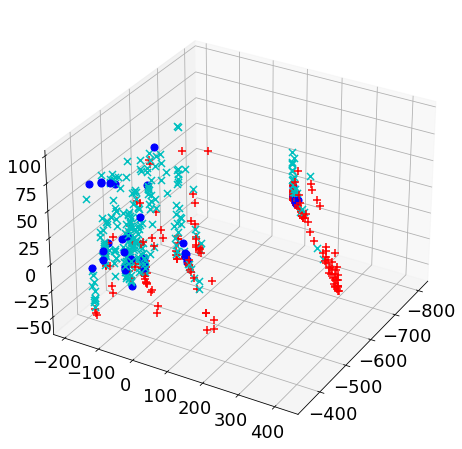

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
#The following code is an example of dimensionality reduction using PCA (Principal Components Analysis)
# Load dataset
H = np.loadtxt(os.path.join('c:/users/omar','DATA','housing.data'))
b = H[:,-1]# housing values in $1000s
A = H[:,:-1]# other factors
 
#Compute the SVD of the data set to extract eigen vectors    
U,S,VT= np.linalg.svd(A, full_matrices=0)
#Once the SVD is computed,the i elements in VT[i,:] represent de variance in the data set sorted by magnitude
#i.e. by hierarchical order 

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

#Then, project the first 3 principal components into the x,y and z axis
#i.e. matrix multiplication of VT[i,:]@A.T, this mean the data is reduced to dimensions x,y,z
#there are three kinds of points ploted, each acorded to different ranges in the home values(i.e. or labels if it's the case)

for j in range(A.shape[0]):
    x = VT[0,:]@ A[j,:].T
    y = VT[1,:]@ A[j,:].T
    z = VT[2,:]@ A[j,:].T
    
    if b[j] < 20 :
        ax.scatter(x,y,z,marker='+',color='r',s=50)
    elif (b[j] >20 ) and (b[j]<40) :
        ax.scatter(x,y,z,marker='x',color='c',s=50)
    
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(30,30)
plt.show()
